In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
ctrain=pd.read_csv(r'/content/drive/My Drive/Python new/PYTHON/PROJECT/PROJECT 2/carvan_train.csv')
ctest=pd.read_csv(r'/content/drive/My Drive/Python new/PYTHON/PROJECT/PROJECT 2/carvan_test.csv')

In [0]:
ctrain["data"]='train'
ctest['data']='test'

In [6]:
ctest['V86']=None
ctrain

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,data
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,train
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,train
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,train
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,train
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,2,6,5,3,2,2,5,2,2,0,0,4,1,3,2,3,3,3,0,9,0,5,1,3,5,4,4,3,3,0,...,0,4,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,train
5818,35,1,4,4,8,1,4,1,4,6,0,3,2,2,5,0,0,9,2,1,1,3,3,2,0,4,5,0,0,3,6,6,1,2,6,3,0,9,0,0,...,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,train
5819,33,1,3,4,8,0,6,0,3,5,1,4,3,3,4,0,1,8,1,0,0,2,3,5,1,1,1,4,4,7,2,4,0,5,8,1,5,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,train
5820,34,1,3,2,8,0,7,0,2,7,2,0,0,4,5,0,2,7,0,2,0,2,4,2,0,0,4,5,0,2,7,5,4,0,9,0,0,5,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,train


In [7]:
ctrain.shape

(5822, 87)

In [8]:
c=pd.concat([ctrain,ctest],0)
c.shape

(9822, 87)

In [9]:
c.dtypes

V1       int64
V2       int64
V3       int64
V4       int64
V5       int64
         ...  
V83      int64
V84      int64
V85      int64
V86     object
data    object
Length: 87, dtype: object

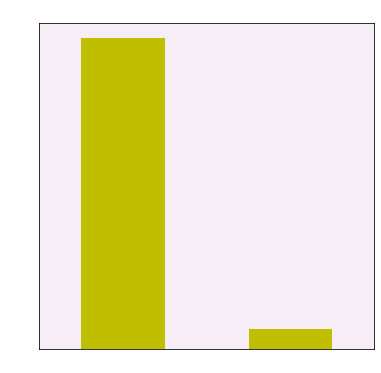

In [10]:

fig, ax = plt.subplots(figsize=(6, 6))
c["V86"].value_counts().plot(kind='bar',color='y')
ax.set_title('Data_imbalanace',color='w')
ax.set_facecolor((0.97,0.93,0.97))
ax.tick_params(axis='x', colors="w")
plt.xticks(rotation=0)
ax.tick_params(axis='y', colors="w")

In [11]:
ctrain.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,...,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829,...,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462,0.273028,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,0.125775,0.240755,0.124189,0.265112,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,5.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0

In [12]:
c.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86', 'data'],
      dtype='object')

In [13]:
[c[i].value_counts() for i in c.columns]

[33    1401
 38     569
 8      546
 39     542
 9      460
 3      433
 23     376
 36     373
 35     362
 41     355
 34     325
 24     324
 31     318
 13     302
 11     286
 10     271
 32     234
 37     233
 1      218
 6      209
 12     194
 30     190
 22     169
 2      148
 29     139
 40     137
 25     129
 4       90
 26      79
 27      77
 7       72
 5       70
 20      42
 28      41
 21      29
 18      27
 16      25
 17      13
 15       7
 19       7
 Name: V1, dtype: int64, 1     8915
 2      821
 3       64
 7        8
 4        4
 6        3
 5        3
 10       2
 8        2
 Name: V2, dtype: int64, 3    4513
 2    3616
 4    1132
 1     452
 5     106
 6       3
 Name: V3, dtype: int64, 3    5154
 2    2409
 4    1777
 5     329
 1     104
 6      49
 Name: V4, dtype: int64, 8     2694
 3     1513
 9     1111
 1      959
 5      940
 7      881
 2      827
 10     492
 6      326
 4       79
 Name: V5, dtype: int64, 0    5420
 1    2744
 2    1213
 3     

In [0]:
cols=list(c.columns)
not_c = ['V4','V5','V6','V1','V44']

In [0]:
def Dummies(data,freq_n):
    for i in cols :
        if i in not_c:
            #print(i)
            freq=c[i].value_counts()
            Cate=freq.index[freq > freq_n] 
            #print(Cate)
            for cat in Cate:
                #print(cat)
                name = str(i)+'_'+str(cat)
               # print(name)
                data[name]= (data[str(i)]==cat).astype(int)
                #print(data[name])
            del data[str(i)]
    return data

In [16]:
Dummies(c,200)

,V2,V3,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V45,...,V1_33,V1_38,V1_8,V1_39,V1_9,V1_3,V1_23,V1_36,V1_35,V1_41,V1_34,V1_24,V1_31,V1_13,V1_11,V1_10,V1_32,V1_37,V1_1,V1_6,V4_3,V4_2,V4_4,V4_5,V5_8,V5_3,V5_9,V5_1,V5_5,V5_7,V5_2,V5_10,V5_6,V6_0,V6_1,V6_2,V6_3,V44_0,V44_2,V44_1
0,1,3,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,2,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,2,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,3,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,4,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,2,7,2,0,5,2,2,2,6,2,0,3,6,5,0,0,1,0,4,2,0,2,4,2,4,5,4,4,2,3,6,3,6,0,0,0,2,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3996,1,2,5,1,3,4,2,4,4,4,2,2,4,4,2,0,0,3,3,3,1,1,2,5,1,7,2,6,0,3,7,2,3,3,2,2,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3997,1,2,5,1,3,7,0,2,2,5,3,2,3,4,2,0,0,3,4,2,1,1,3,5,0,7,2,6,1,2,6,3,2,5,3,0,0,4,3,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3998,1,3,4,2,3,7,1,2,2,3,4,1,3,5,1,1,1,2,3,3,2,2,2,4,1,4,5,6,2,2,7,2,1,4,4,1,0,4,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [17]:
print(c.isna().sum())
c

V2       0
V3       0
V7       0
V8       0
V9       0
        ..
V6_2     0
V6_3     0
V44_0    0
V44_2    0
V44_1    0
Length: 122, dtype: int64


,V2,V3,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V45,...,V1_33,V1_38,V1_8,V1_39,V1_9,V1_3,V1_23,V1_36,V1_35,V1_41,V1_34,V1_24,V1_31,V1_13,V1_11,V1_10,V1_32,V1_37,V1_1,V1_6,V4_3,V4_2,V4_4,V4_5,V5_8,V5_3,V5_9,V5_1,V5_5,V5_7,V5_2,V5_10,V5_6,V6_0,V6_1,V6_2,V6_3,V44_0,V44_2,V44_1
0,1,3,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,2,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,2,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,3,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,4,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,2,7,2,0,5,2,2,2,6,2,0,3,6,5,0,0,1,0,4,2,0,2,4,2,4,5,4,4,2,3,6,3,6,0,0,0,2,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3996,1,2,5,1,3,4,2,4,4,4,2,2,4,4,2,0,0,3,3,3,1,1,2,5,1,7,2,6,0,3,7,2,3,3,2,2,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3997,1,2,5,1,3,7,0,2,2,5,3,2,3,4,2,0,0,3,4,2,1,1,3,5,0,7,2,6,1,2,6,3,2,5,3,0,0,4,3,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3998,1,3,4,2,3,7,1,2,2,3,4,1,3,5,1,1,1,2,3,3,2,2,2,4,1,4,5,6,2,2,7,2,1,4,4,1,0,4,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [0]:
train_data=c[c["data"]=='train']
test_data=c[c["data"]=='test']
train=train_data.drop(['data'],1)
test=test_data.drop(['data','V86'],1)

In [0]:
class_0=train_data[train_data['V86']==0]
class_1=train_data[train_data['V86']==1]

In [0]:
from sklearn.utils import resample

In [0]:
class_upsampled = resample(class_1,
                          replace=True, # sample with replacement
                          n_samples=len(class_0), # match number in majority class
                          random_state=27)

In [0]:
resamp=pd.concat([class_0,class_upsampled],ignore_index=True)
X=resamp.drop(['data','V86'],axis=1)
y=resamp['V86']
y=y.astype(int)

In [23]:
X

,V2,V3,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V45,...,V1_33,V1_38,V1_8,V1_39,V1_9,V1_3,V1_23,V1_36,V1_35,V1_41,V1_34,V1_24,V1_31,V1_13,V1_11,V1_10,V1_32,V1_37,V1_1,V1_6,V4_3,V4_2,V4_4,V4_5,V5_8,V5_3,V5_9,V5_1,V5_5,V5_7,V5_2,V5_10,V5_6,V6_0,V6_1,V6_2,V6_3,V44_0,V44_2,V44_1
0,1,3,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,2,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,2,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,3,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,1,4,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,1,2,3,3,4,5,0,4,4,1,5,0,0,9,0,0,0,4,0,5,0,0,0,5,4,9,0,6,0,3,9,0,1,6,3,0,0,4,4,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
10944,1,2,5,2,2,9,0,0,5,2,3,5,1,3,7,0,0,2,0,0,1,1,5,3,0,0,9,6,3,0,5,4,0,1,4,5,0,6,8,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
10945,1,4,6,0,3,9,0,0,0,3,6,0,0,9,0,0,3,0,6,0,0,0,3,6,0,9,0,7,2,0,9,0,3,5,2,0,0,3,3,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10946,2,4,5,0,5,9,0,0,0,0,9,0,5,5,0,0,0,9,0,0,0,4,0,5,0,0,9,6,3,0,2,7,0,9,0,0,0,3,7,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [25]:
print(X_train.shape)
X_test.shape

(7663, 120)


(3285, 120)

In [0]:
logr=LogisticRegression(class_weight="balanced",random_state= 3)

In [27]:
logr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred=logr.predict(X_test)

In [29]:
roc_auc_score(y_test,y_pred)

0.7335348318954876

In [30]:
prob_score=pd.Series(list(zip(*logr.predict_proba(X_train)))[1])
prob_score.shape

(7663,)

In [0]:
#  * in above is used for bind all 1st columns in a list . list(zip(*logr.predict_proba(x_train)))[1]

In [0]:
cutoffs=np.linspace(0.010,0.99,100)
def Fbeta_perf(beta,cutoffs,y_train,prob_score):
    FB_cut=[]
    for cutoff in cutoffs:
        predicted=pd.Series([0]*len(y_train))
        predicted[prob_score>cutoff]=1
        df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        
        
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        FB_cut.append(FB)

    cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])

    FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]

    prob_score_test=pd.Series(list(zip(*logr.predict_proba(X_test)))[1])

    predicted_test=pd.Series([0]*len(y_test))
    predicted_test[prob_score_test>float(FB_cutoff)]=1

    df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

    k=pd.crosstab(df_test['real'],df_test["predicted"])
#     print('confusion matrix :\n \n ',k)
    TN=k.iloc[0,0]
    TP=k.iloc[1,1]
    FP=k.iloc[0,1]
    FN=k.iloc[1,0]
    P=TP+FN
    N=TN+FP
    Precision=TP/(TP+FP)
    Recall=TP/P
    FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
            
    print('For beta :',beta)
    print('Accuracy is :',(TP+TN)/(P+N))
    print('Sensitivity is :',(TP/P))
    print('Specificity is :',(TN/N))
    print("precision:",TP/(TP+FP))
    print('fb score:',FB)
    print('\n \n \n')
    

In [0]:
s=pd.crosstab(y_test,y_pred)

In [34]:
s

col_0,0,1
V86,,
0,1140,498
1,377,1270


In [35]:
Fbeta_perf(0.5,cutoffs,y_train,prob_score)
Fbeta_perf(1,cutoffs,y_train,prob_score)
Fbeta_perf(2,cutoffs,y_train,prob_score)

For beta : 0.5
Accuracy is : 0.7272450532724505
Sensitivity is : 0.7006678809957498
Specificity is : 0.753968253968254
precision: 0.7411689145793192
fb score: 0.7326984126984127

 
 

For beta : 1
Accuracy is : 0.723896499238965
Sensitivity is : 0.8615664845173042
Specificity is : 0.5854700854700855
precision: 0.6763584366062917
fb score: 0.7578104138851802

 
 

For beta : 2
Accuracy is : 0.6417047184170472
Sensitivity is : 0.98421372191864
Specificity is : 0.2973137973137973
precision: 0.5847763347763347
fb score: 0.8659188034188035

 
 



In [0]:
RESULT=logr.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rfc=RandomForestClassifier()
param_grid={
    'max_depth':[i for i in range(1,10) ],
    'criterion':['entropy','gini']
}
cv_rfc=GridSearchCV(rfc,param_grid=param_grid,cv=5)
cv_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [0]:
rf=cv_rfc.best_estimator_

In [40]:
pred3=rf.predict(X_test)
train_pred=rf.predict(X_train)
prob_score1=pd.Series(list(zip(*rf.predict_proba(X_train)))[1])
print('Train roc_auc_score = %0.2f' %roc_auc_score(y_train,train_pred))
print('Test roc_auc_score = %0.2f' %roc_auc_score(y_test,pred3))

Train roc_auc_score = 0.92
Test roc_auc_score = 0.90


In [41]:
s=pd.crosstab(y_test,pred3)
s

col_0,0,1
V86,,
0,1390,248
1,70,1577


In [0]:
cutoffs=np.linspace(0.010,0.89,100)
def Fbeta_perf(beta,cutoffs,y_train,prob_score):
    FB_cut=[]
    for cutoff in cutoffs:
        predicted=pd.Series([0]*len(y_train))
        predicted[prob_score>cutoff]=1
        df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        
        
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        FB_cut.append(FB)

    cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])

    FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]

    prob_score_test=pd.Series(list(zip(*rf.predict_proba(X_test)))[1])

    predicted_test=pd.Series([0]*len(y_test))
    predicted_test[prob_score_test>float(FB_cutoff)]=1

    df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

    k=pd.crosstab(df_test['real'],df_test["predicted"])
#     print('confusion matrix :\n \n ',k)
    TN=k.iloc[0,0]
    TP=k.iloc[1,1]
    FP=k.iloc[0,1]
    FN=k.iloc[1,0]
    P=TP+FN
    N=TN+FP
    Precision=TP/(TP+FP)
    Recall=TP/P
    FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
            
    print('For beta :',beta)
    print('Accuracy is :',(TP+TN)/(P+N))
    print('Sensitivity is :',(TP/P))
    print('Specificity is :',(TN/N))
    print("precision:",TP/(TP+FP))
    print('fb score:',FB)
    print('\n \n \n')
    

In [43]:
Fbeta_perf(0.5,cutoffs,y_train,prob_score1)
Fbeta_perf(1,cutoffs,y_train,prob_score1)
Fbeta_perf(2,cutoffs,y_train,prob_score1)

For beta : 0.5
Accuracy is : 0.8858447488584474
Sensitivity is : 0.8597449908925319
Specificity is : 0.9120879120879121
precision: 0.9076923076923077
fb score: 0.897679726131609

 
 

For beta : 1
Accuracy is : 0.902283105022831
Sensitivity is : 0.949605343047966
Specificity is : 0.8547008547008547
precision: 0.8679245283018868
fb score: 0.906929544795593

 
 

For beta : 2
Accuracy is : 0.8730593607305936
Sensitivity is : 0.9939283545840923
Specificity is : 0.7515262515262515
precision: 0.800880626223092
fb score: 0.9482159406858202

 
 



In [0]:
prob_score2=pd.Series(list(zip(*rf.predict_proba(X_test)))[1])

In [0]:
import plotly.graph_objects as go
from sklearn import metrics

In [0]:
fpr, tpr, threshold = metrics.roc_curve(y_test,prob_score2 )
roc_auc = metrics.auc(fpr, tpr)

In [47]:
data=[go.Scatter(x=fpr,y=tpr,name='AUC = %0.2f' % roc_auc)]
layout1=go.Layout(title='ROC curve',
                  xaxis=dict(title='FPR'),
                  yaxis=dict(title='TPR'),showlegend=True
                  )
fig=go.Figure(data=data,layout=layout1)
fig.show()

In [49]:
RESULT=rf.predict(test)
RESULT

array([0, 1, 1, ..., 0, 1, 0])

In [0]:
result=pd.DataFrame(RESULT).to_csv('/content/drive/My Drive/Python new/PYTHON/PROJECT/PROJECT 2/RAHUL_SHEDGE_P2_part2.csv',index=False)